In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Import Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Feature Descriptions

- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License: 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: 1 : Customer is interested, 0 : Customer is not interested

## 2. Describe Data

In [3]:
df.shape

(381109, 12)

In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [6]:
datadesc = []
for i in df.columns:
    datadesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [7]:
pd.DataFrame(data=datadesc, columns=['Data Features','Data Types','Null','% Null','Nunique','Unique_sample'])

,Data Features,Data Types,Null,% Null,Nunique,Unique_sample
0,id,int64,0,0.0,381109,"[223208, 365635]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[74, 67]"
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,float64,0,0.0,53,"[9.0, 19.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[1-2 Year, > 2 Years]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,float64,0,0.0,48838,"[41888.0, 31442.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[90.0, 12.0]"


## 3. Exploratory Data Analysis

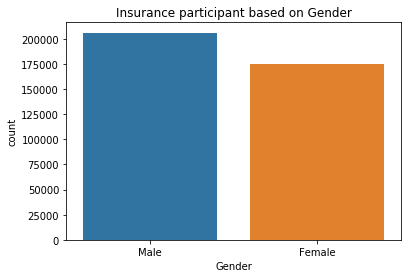

In [8]:
sns.countplot(df['Gender'])
plt.title('Insurance participant based on Gender')
plt.show()

In [9]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

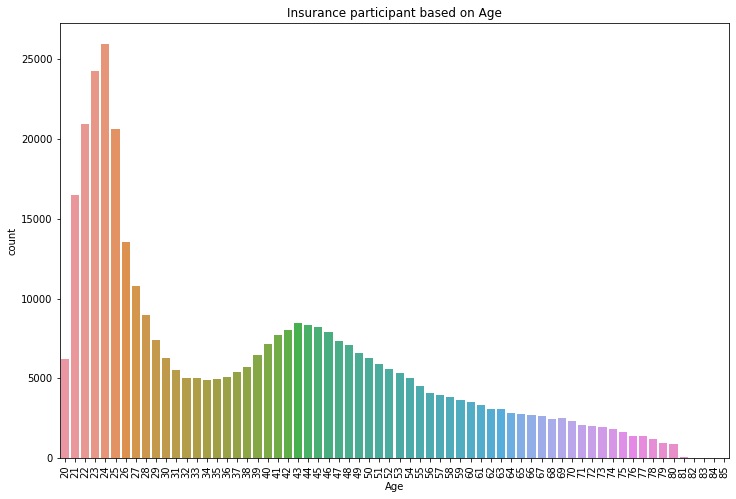

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df['Age'])
plt.xticks(rotation=90)
plt.title('Insurance participant based on Age')
plt.show()

In [11]:
df['Age'].value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

### Driving_License

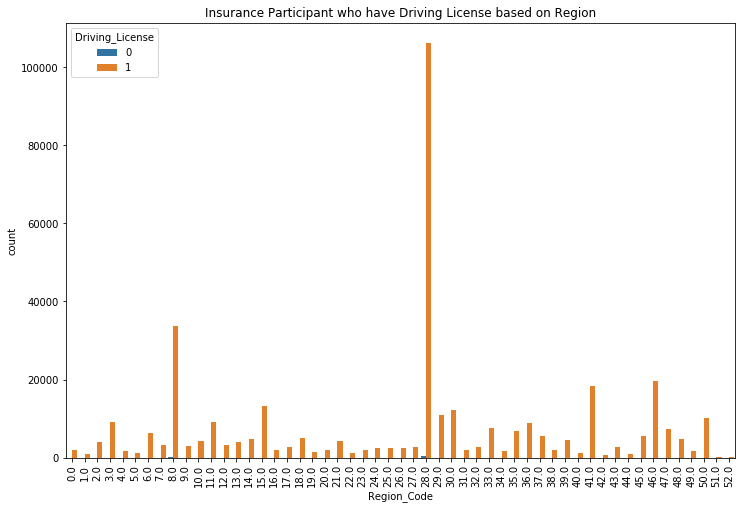

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'], hue=df['Driving_License'])
plt.xticks(rotation=90)
plt.title('Insurance Participant who have Driving License based on Region')
plt.show()

In [13]:
pd.crosstab(index=[df['Driving_License'], df['Gender']], columns='N_DL').sort_values('N_DL', ascending=False)

col_0                     N_DL
Driving_License Gender        
1               Male    205489
                Female  174808
0               Male       600
                Female     212

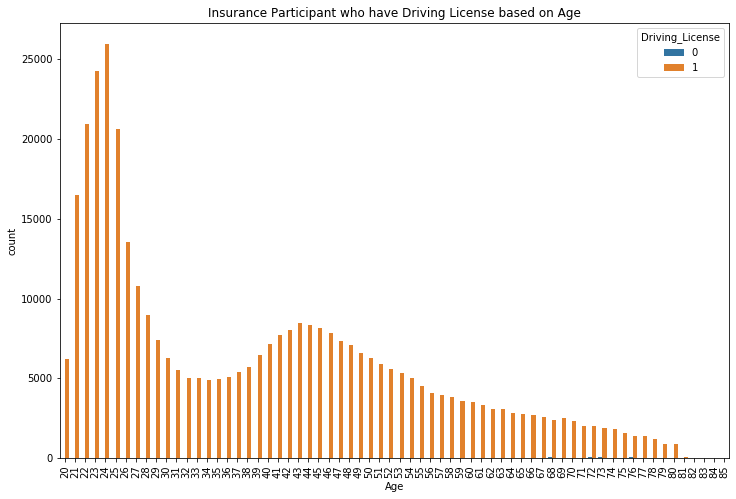

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(df['Age'], hue=df['Driving_License'])
plt.xticks(rotation=90)
plt.title('Insurance Participant who have Driving License based on Age')
plt.show()

In [15]:
pd.crosstab(index=df['Driving_License'], columns=df['Age'])

Age,20,21,22,23,24,25,26,27,28,29,...,76,77,78,79,80,81,82,83,84,85
Driving_License,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,1,0,0,0,1,0,...,35,26,32,26,24,6,3,1,1,1
1,6232,16456,20964,24256,25959,20636,13535,10760,8973,7429,...,1361,1362,1184,889,885,50,26,21,10,10


- The majority of insurance participants have a driving license

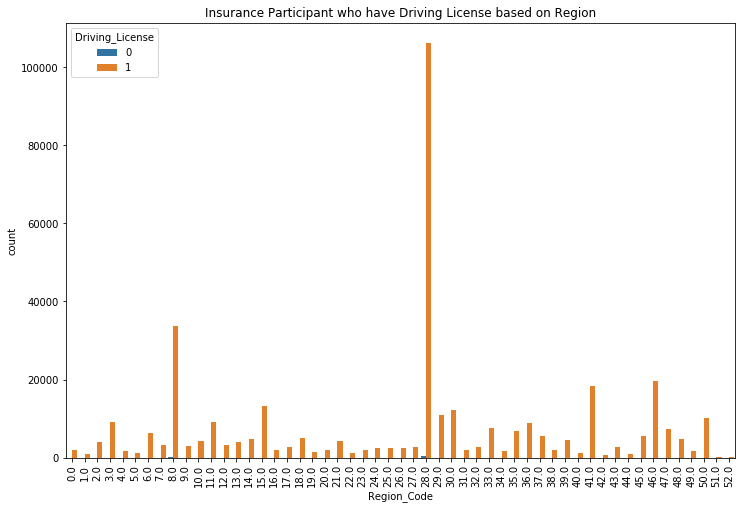

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'], hue=df['Driving_License'])
plt.xticks(rotation=90)
plt.title('Insurance Participant who have Driving License based on Region')
plt.show()

In [17]:
pd.crosstab(index=df['Driving_License'], columns=df['Region_Code'])

Region_Code,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
Driving_License,,,,,,,,,,,,,,,,,,,,,
0,7,2,4,15,5,1,5,7,75,7,...,2,1,5,30,14,26,3,14,0,0
1,2014,1006,4034,9236,1796,1278,6275,3272,33802,3094,...,2637,807,5600,19719,7422,4655,1829,10229,183,267


### Region_Code

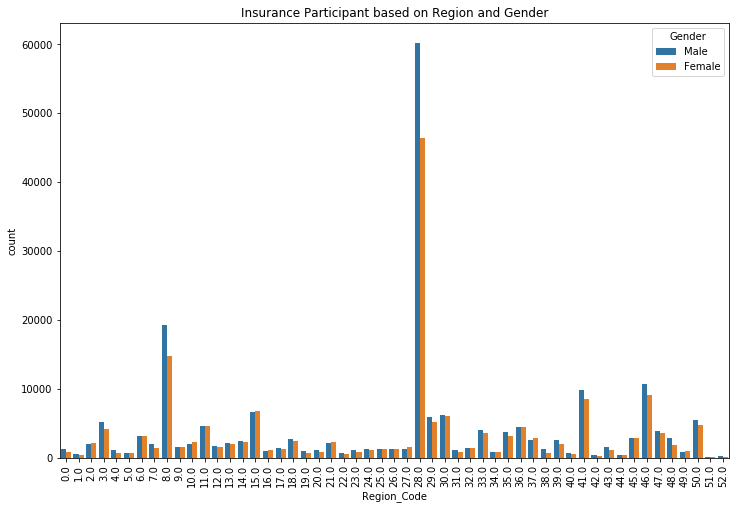

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'], hue=df['Gender'])
plt.xticks(rotation=90)
plt.title('Insurance Participant based on Region and Gender')
plt.show()

In [19]:
pd.crosstab(index=df['Region_Code'], columns='N_Insurance_Participant').sort_values('N_Insurance_Participant', ascending=False)

col_0,N_Insurance_Participant
Region_Code,
28.0,106415
8.0,33877
46.0,19749
41.0,18263
15.0,13308
30.0,12191
29.0,11065
50.0,10243
3.0,9251


- Region_Code 28 is the region with the most insurance participants, very significant than others
- Region_Code 51 is the region with the least number of insurance participants
- Almost all regions were dominated by male participants. but there are some regions where the female participant is higher like region_code 10,15,16,21,27,37,49

### Previously_Insured

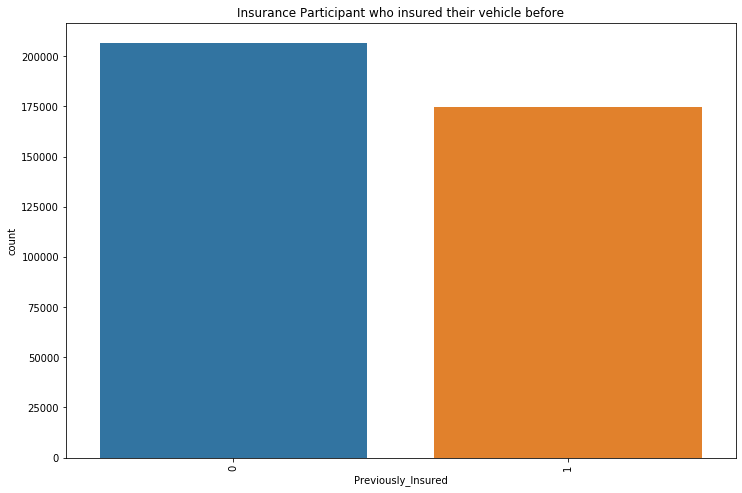

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df['Previously_Insured'])
plt.xticks(rotation=90)
plt.title('Insurance Participant who insured their vehicle before')
plt.show()

In [21]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

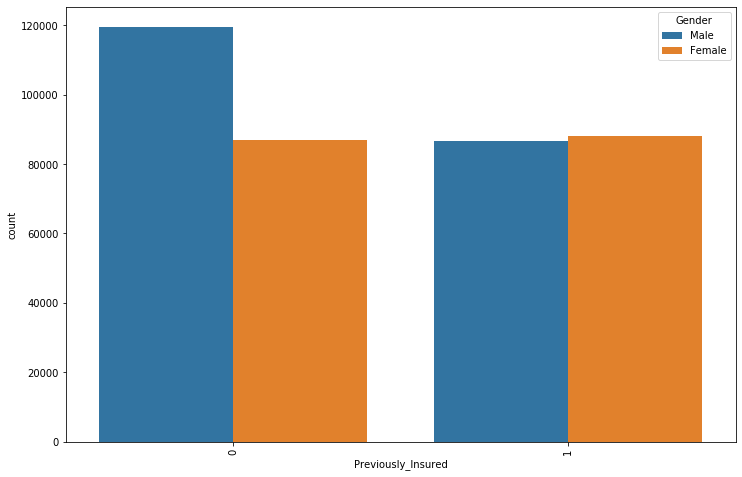

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(df['Previously_Insured'], hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

In [23]:
pd.crosstab(index=df['Previously_Insured'], columns=df['Gender'])

Gender,Female,Male
Previously_Insured,,
0,87071,119410
1,87949,86679


- More insurance participants do not have vehicle insurance than those who already have vehicle insurance
- Most of the insurance participants who do not have vehicle insurance are male

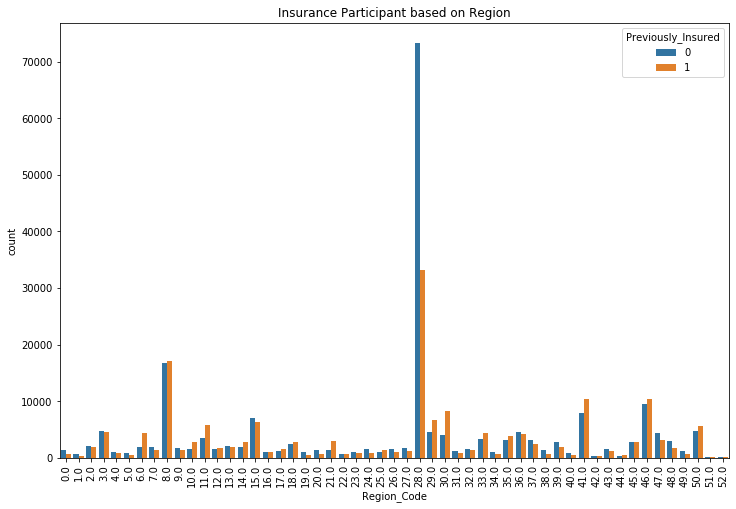

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'], hue=df['Previously_Insured'])
plt.xticks(rotation=90)
plt.title('Insurance Participant based on Region')
plt.show()

- In region_code 28 more participants do not have vehicle insurance. the difference is very significant compared to participants who already have vehicle insurance before
- However, there are several regions where the number of participants who have vehicle insurance is more than participants who do not have vehicle insurance like region_code 6,8,10,11,12,14,17,18,21,25,29,30,33,35,41,46,50, and etc

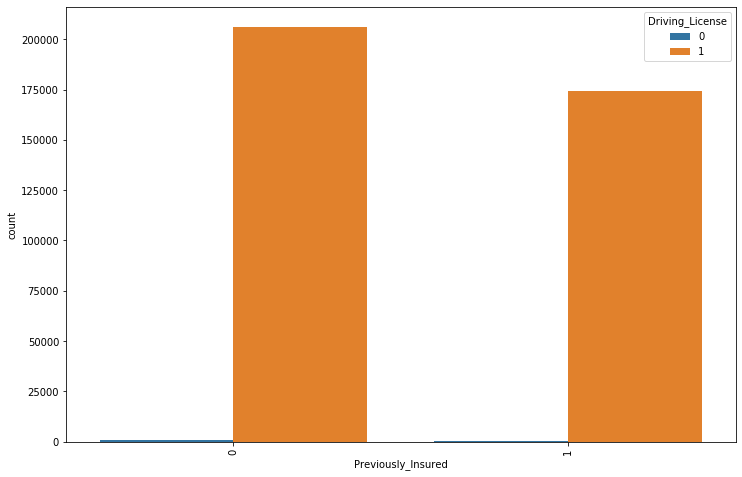

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(df['Previously_Insured'], hue=df['Driving_License'])
plt.xticks(rotation=90)
plt.show()

- It turns out that many insurance participants already have a driving license but they do not have vehicle insurance

### Vehicle_Age

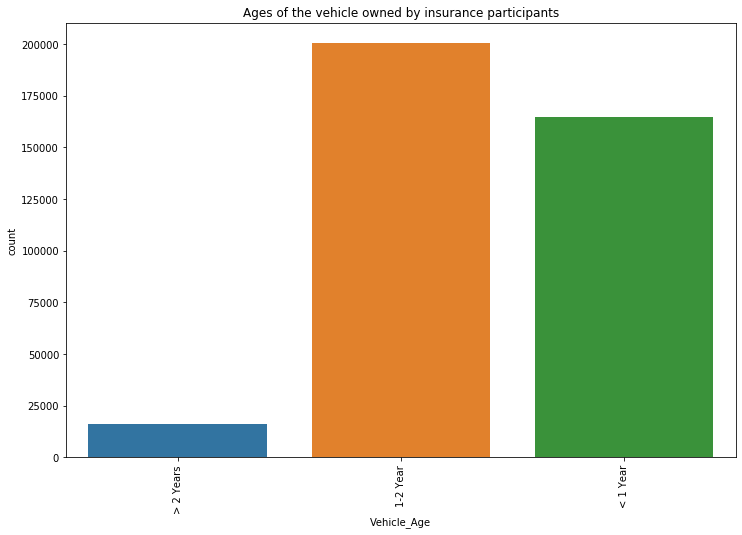

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_Age'])
plt.xticks(rotation=90)
plt.title('Ages of the vehicle owned by insurance participants')
plt.show()

In [27]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

- Insurance participants mostly own vehicles aged 1-2 years, while vehicles that are rarely owned are vehicles older than 2 years

In [28]:
print('Vehicle age based on Gender:')
pd.crosstab(index=df['Vehicle_Age'], columns=df['Gender'])

Vehicle age based on Gender:


Gender,Female,Male
Vehicle_Age,,
1-2 Year,77992,122324
< 1 Year,91321,73465
> 2 Years,5707,10300


- Most of male participants have vehicles aged 1-2 years
- Most of female participants have vehicles aged < 1 year

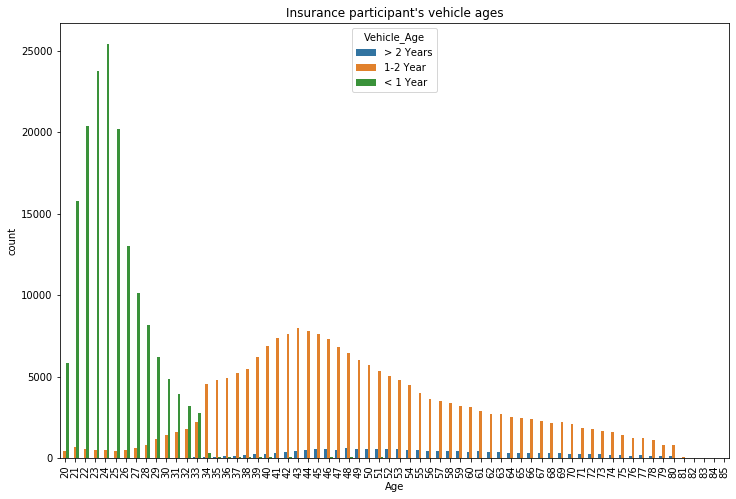

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(df['Age'], hue=df['Vehicle_Age'])
plt.xticks(rotation=90)
plt.title("Insurance participant's vehicle ages")
plt.show()

In [30]:
print('Vehicle age based on Age:')
pd.crosstab(index=df['Vehicle_Age'], columns=df['Age'])

Vehicle age based on Age:


Age,20,21,22,23,24,25,26,27,28,29,...,76,77,78,79,80,81,82,83,84,85
Vehicle_Age,,,,,,,,,,,,,,,,,,,,,
1-2 Year,416,655,572,501,520,457,493,610,829,1192,...,1241,1213,1078,802,806,52,25,19,11,11
< 1 Year,5809,15794,20389,23749,25432,20175,13040,10142,8142,6230,...,3,2,2,0,2,0,0,0,0,0
> 2 Years,7,8,3,6,8,4,2,8,3,7,...,152,173,136,113,101,4,4,3,0,0


- vehicles aged < 1 year are mostly owned by participants aged 24
- vehicles aged 1-2 years are mostly owned by participants aged 43
- vehicles aged > 2 years are mostly owned by participants aged 48

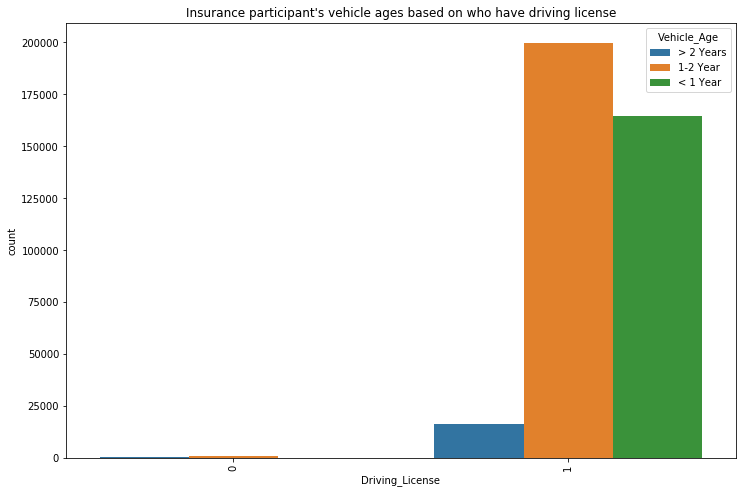

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(df['Driving_License'], hue=df['Vehicle_Age'])
plt.xticks(rotation=90)
plt.title("Insurance participant's vehicle ages based on who have driving license")
plt.show()

In [32]:
print('Vehicle age based on Gender:')
pd.crosstab(index=df['Vehicle_Age'], columns=df['Driving_License'])

Vehicle age based on Gender:


Driving_License,0,1
Vehicle_Age,,
1-2 Year,755,199561
< 1 Year,1,164785
> 2 Years,56,15951


- Apparently there were some participants who did not have a driving license but had a vehicle

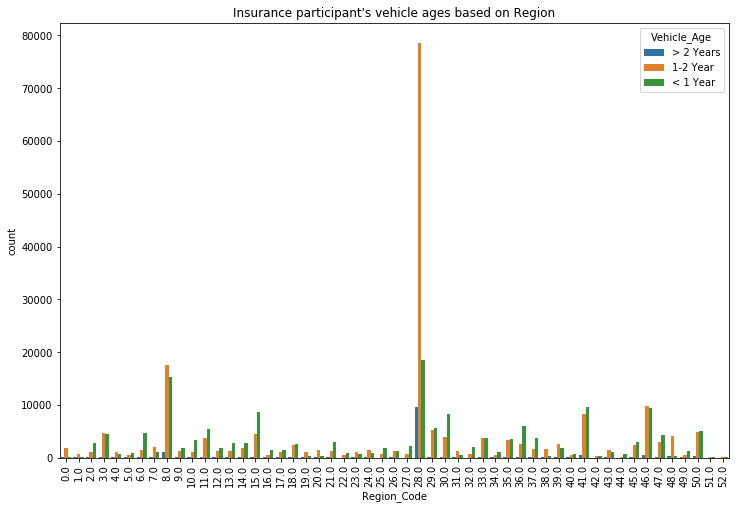

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'], hue=df['Vehicle_Age'])
plt.xticks(rotation=90)
plt.title("Insurance participant's vehicle ages based on Region")
plt.show()

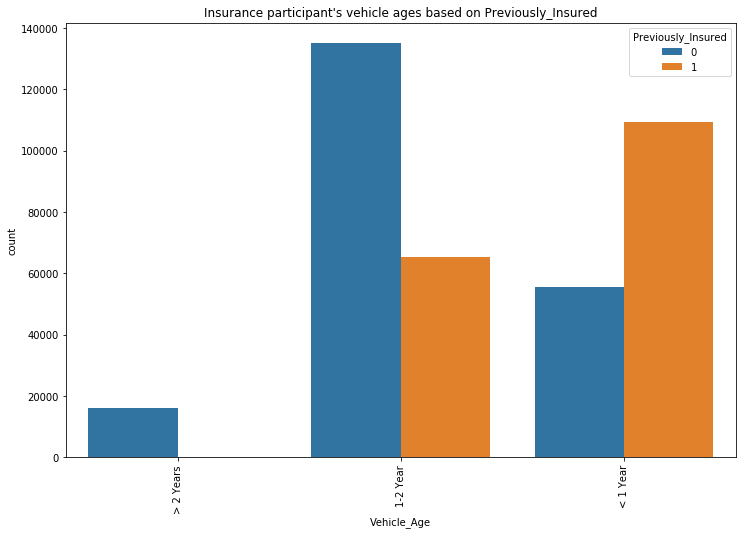

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_Age'], hue=df['Previously_Insured'])
plt.xticks(rotation=90)
plt.title("Insurance participant's vehicle ages based on Previously_Insured")
plt.show()

In [35]:
print('Vehicle age based on Previously_Insured:')
pd.crosstab(index=df['Vehicle_Age'], columns=df['Previously_Insured'])

Vehicle age based on Previously_Insured:


Previously_Insured,0,1
Vehicle_Age,,
1-2 Year,134991,65325
< 1 Year,55529,109257
> 2 Years,15961,46


- Insurance participants who own a vehicle aged <1 year, are more likely to already have vehicle insurance. 
- This is inversely proportional to insurance participants who have vehicles aged 1-2 years, more of them do not have vehicle insurance.
- While insurance participants who have vehicles aged> 2 years, no one has vehicle insurance

### Vehicle_Damage

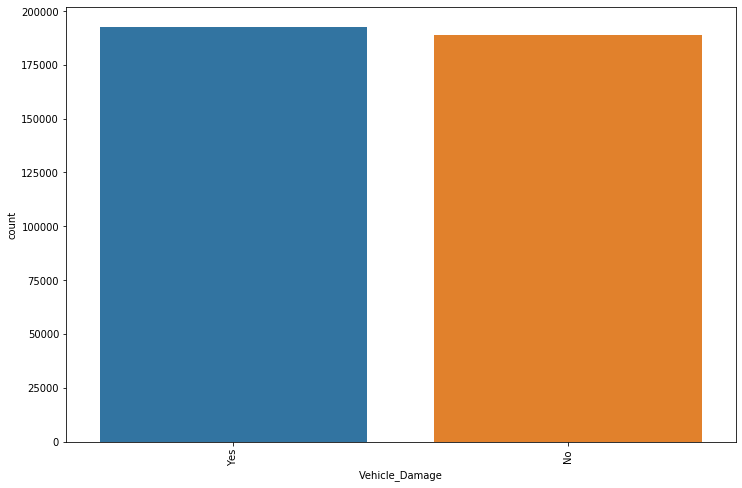

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_Damage'])
plt.xticks(rotation=90)
# plt.title("Insurance participant's vehicle ages based on Previously_Insured")
plt.show()

In [37]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

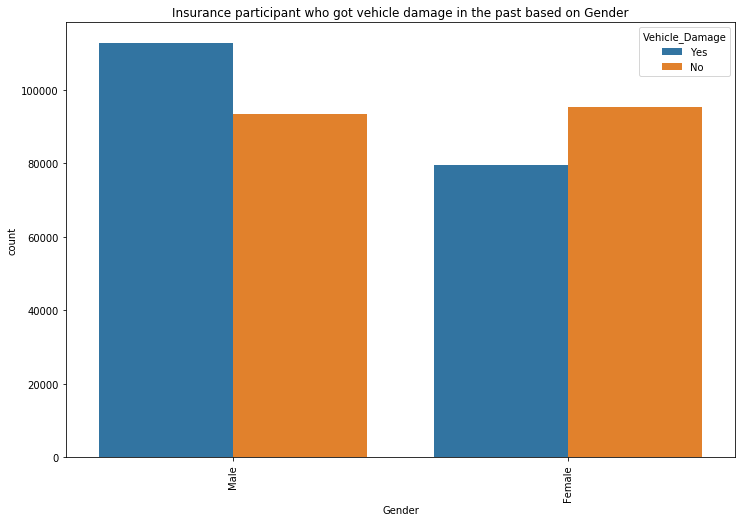

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(df['Gender'], hue=df['Vehicle_Damage'])
plt.xticks(rotation=90)
plt.title("Insurance participant who got vehicle damage in the past based on Gender")
plt.show()

In [39]:
print('Vehicle Damage based on Gender:')
pd.crosstab(index=df['Vehicle_Damage'], columns=df['Gender'])

Vehicle Damage based on Gender:


Gender,Female,Male
Vehicle_Damage,,
No,95355,93341
Yes,79665,112748


- More male participants got vehicle damaged in the past.
- More female participants didn't get vehicle damaged.

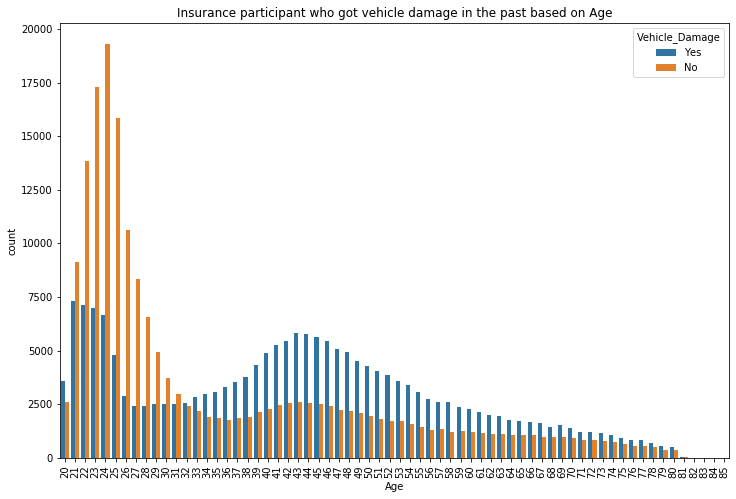

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(df['Age'], hue=df['Vehicle_Damage'])
plt.xticks(rotation=90)
plt.title("Insurance participant who got vehicle damage in the past based on Age")
plt.show()

- Many participants aged 21-24 years have got vehicle damage in the past but the number is less than participants who didn't get vehicle damage
- Many participants aged 32-80 years have got vehicle damage in the past and the number is more than the participants who didn't get vehicle damage

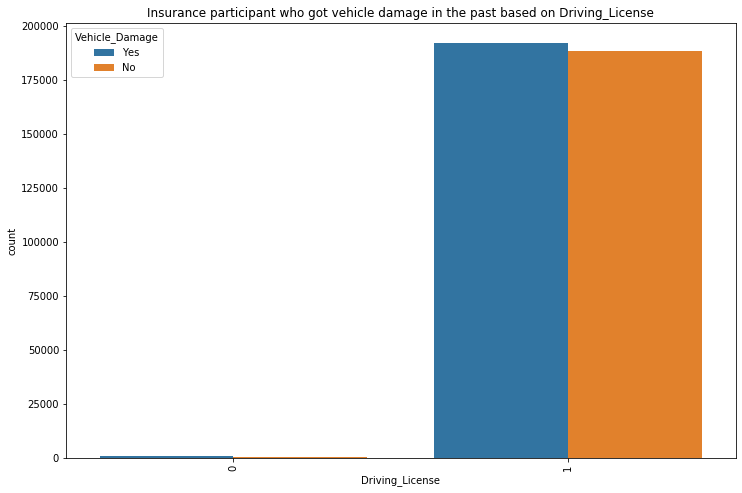

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(df['Driving_License'], hue=df['Vehicle_Damage'])
plt.xticks(rotation=90)
plt.title("Insurance participant who got vehicle damage in the past based on Driving_License")
plt.show()

In [42]:
print('Vehicle Damage based on Driving_License:')
pd.crosstab(index=df['Vehicle_Damage'], columns=df['Driving_License'])

Vehicle Damage based on Driving_License:


Driving_License,0,1
Vehicle_Damage,,
No,256,188440
Yes,556,191857


- The number of participants who have a driving license and have get vehicle damage is more than those who have never get vehicle damage, but the difference is only slightly
- The number of participants who did not have a driving license and had received vehicle damage was greater than those who had never received vehicle damage, even though the number of both was not large

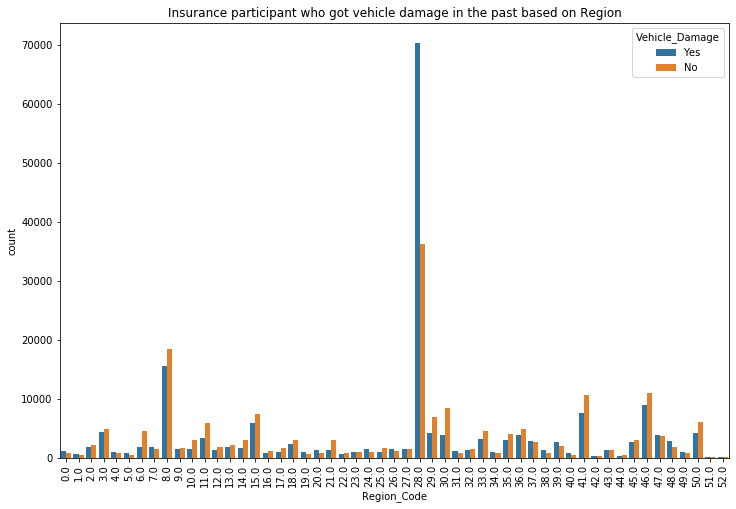

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'], hue=df['Vehicle_Damage'])
plt.xticks(rotation=90)
plt.title("Insurance participant who got vehicle damage in the past based on Region")
plt.show()

- Participants who have received vehicle damage are mostly from region 28

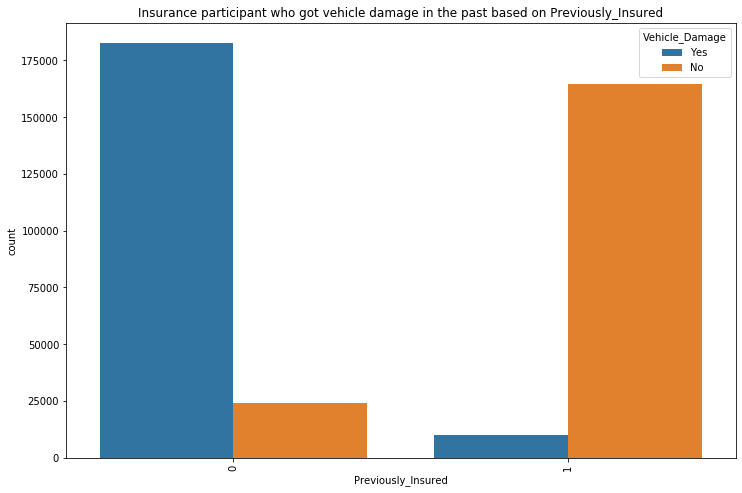

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(df['Previously_Insured'], hue=df['Vehicle_Damage'])
plt.xticks(rotation=90)
plt.title("Insurance participant who got vehicle damage in the past based on Previously_Insured")
plt.show()

- Many participants who already have vehicle insurance didn't get vehicle damage.
- Meanwhile, participants who do not have vehicle insurance, many of them have get vehicle damage

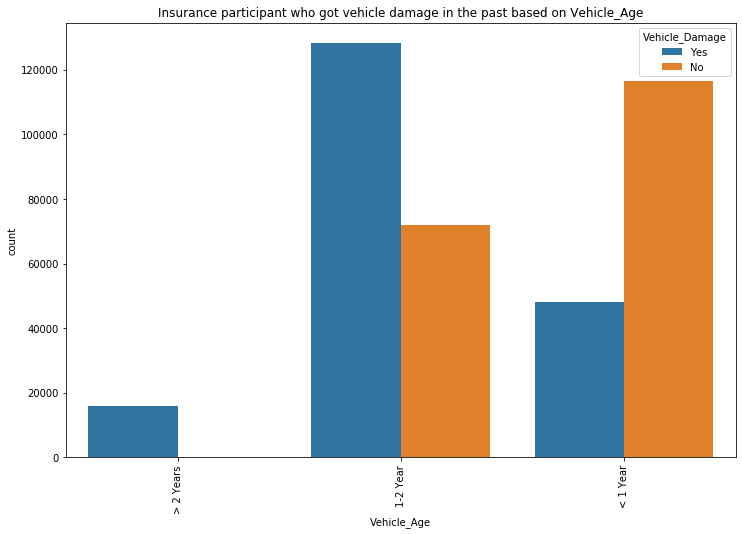

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_Age'], hue=df['Vehicle_Damage'])
plt.xticks(rotation=90)
plt.title("Insurance participant who got vehicle damage in the past based on Vehicle_Age")
plt.show()

- On < 1 year many vehicles didn't get vehicle damage
- On 1-2 year many vehicles have got vehicle damage in the past
- All vehicles on > 2 years have got vehicle damage in the past

### Annual_Premium

In [46]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [47]:
q1 = df['Annual_Premium'].describe()['25%']
q3 = df['Annual_Premium'].describe()['75%']
IQR = q3 - q1
upper_fence = q3 + (1.5 * IQR)
lower_fence = q1 - (1.5 * IQR)
print('upper_fence:',upper_fence)
print('lower_fence:',lower_fence)

upper_fence: 61892.5
lower_fence: 1912.5


- There are outliers in Annual_Premium, those the value more than upper_fence

In [48]:
df[df['Annual_Premium'] == 540165.0]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
54743,54744,Male,26,1,28.0,0,< 1 Year,Yes,540165.0,156.0,245,1
144282,144283,Female,53,1,28.0,1,1-2 Year,No,540165.0,26.0,134,0
190154,190155,Male,47,1,28.0,0,1-2 Year,Yes,540165.0,42.0,24,0
268332,268333,Male,46,1,28.0,0,1-2 Year,Yes,540165.0,124.0,59,0


In [49]:
df[['Gender','Annual_Premium']].groupby(['Gender']).mean().round().sort_values('Annual_Premium', ascending=False)

,Annual_Premium
Gender,
Male,30623.0
Female,30496.0


In [50]:
df[['Age','Annual_Premium']].groupby(['Age']).mean().round().sort_values('Annual_Premium', ascending=False)

,Annual_Premium
Age,
82,37705.0
84,35441.0
77,34904.0
71,34869.0
75,34747.0
...,...
35,27016.0
20,26925.0
33,26874.0


In [51]:
df[['Driving_License','Annual_Premium']].groupby(['Driving_License']).mean().round().sort_values('Annual_Premium', ascending=False)

,Annual_Premium
Driving_License,
0,35000.0
1,30555.0


In [52]:
df[['Region_Code','Annual_Premium']].groupby(['Region_Code']).mean().round().sort_values('Annual_Premium', ascending=False)

,Annual_Premium
Region_Code,
28.0,38669.0
8.0,36468.0
17.0,31487.0
50.0,30955.0
41.0,30949.0
52.0,30334.0
47.0,30225.0
15.0,29625.0
29.0,29415.0


In [53]:
df[['Previously_Insured','Annual_Premium']].groupby(['Previously_Insured']).mean().round().sort_values('Annual_Premium', ascending=False)

,Annual_Premium
Previously_Insured,
1,30644.0
0,30497.0


In [54]:
df[['Vehicle_Age','Annual_Premium']].groupby(['Vehicle_Age']).mean().round().sort_values('Annual_Premium', ascending=False)

,Annual_Premium
Vehicle_Age,
> 2 Years,35654.0
1-2 Year,30524.0
< 1 Year,30120.0


In [55]:
df[['Vehicle_Damage','Annual_Premium']].groupby(['Vehicle_Damage']).mean().round().sort_values('Annual_Premium', ascending=False)

,Annual_Premium
Vehicle_Damage,
Yes,30724.0
No,30402.0


### Response

In [56]:
round((df['Response'].value_counts()/len(df))*100)  # Change to percentage

0    88.0
1    12.0
Name: Response, dtype: float64

- Target are imbalance
- Class 0: 88% (Majority) ; Class 1: 12% (Minority)

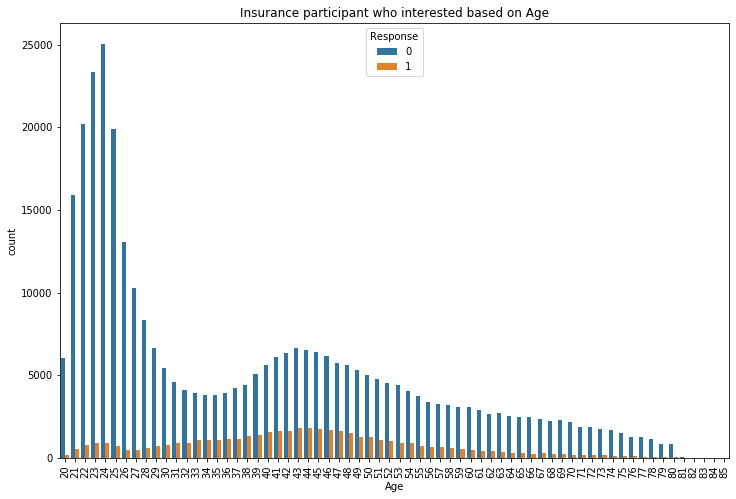

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(df['Age'], hue=df['Response'])
plt.xticks(rotation=90)
plt.title("Insurance participant who interested based on Age")
plt.show()

- High interest in vehicle insurance is found in participants with an age range of 38 - 50 years. Although the number was smaller than the disinterested participants

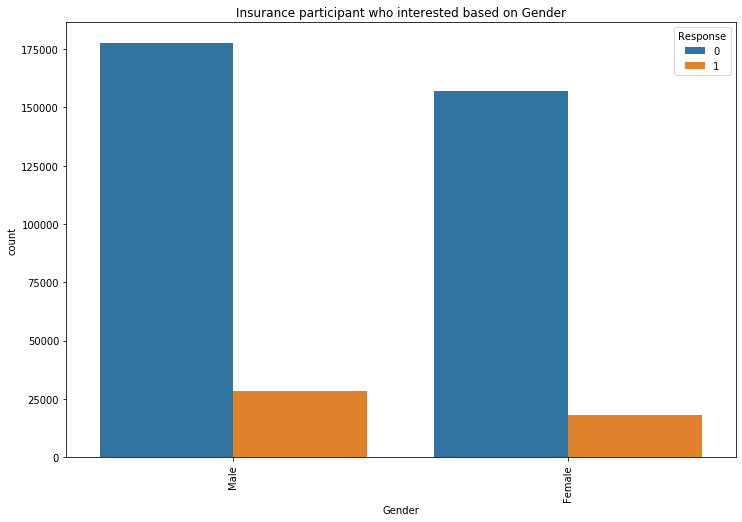

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(df['Gender'], hue=df['Response'])
plt.xticks(rotation=90)
plt.title("Insurance participant who interested based on Gender")
plt.show()

In [59]:
pd.crosstab(index=df['Gender'], columns=df['Response'])

Response,0,1
Gender,,
Female,156835,18185
Male,177564,28525


- Female participants were less interested in vehicle insurance offers than male participants

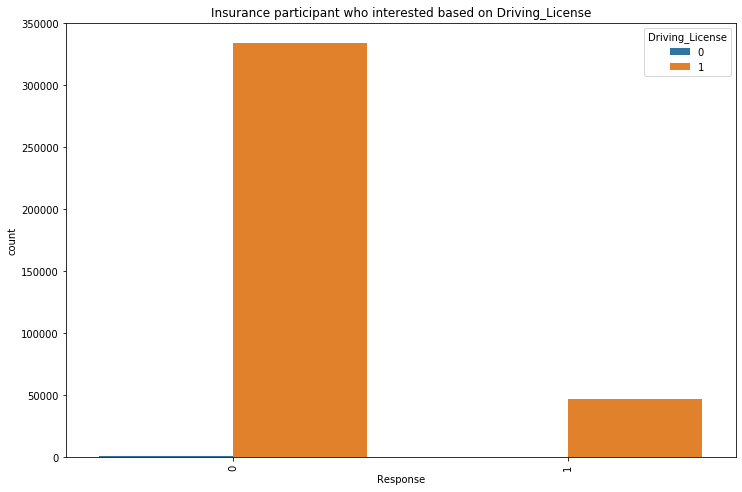

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(df['Response'], hue=df['Driving_License'])
plt.xticks(rotation=90)
plt.title("Insurance participant who interested based on Driving_License")
plt.show()

In [61]:
pd.crosstab(index=df['Driving_License'], columns=df['Response'])

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


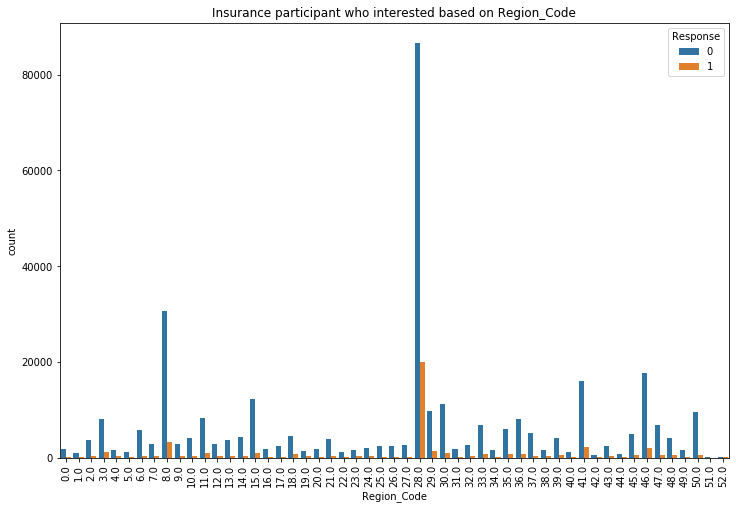

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(df['Region_Code'], hue=df['Response'])
plt.xticks(rotation=90)
plt.title("Insurance participant who interested based on Region_Code")
plt.show()

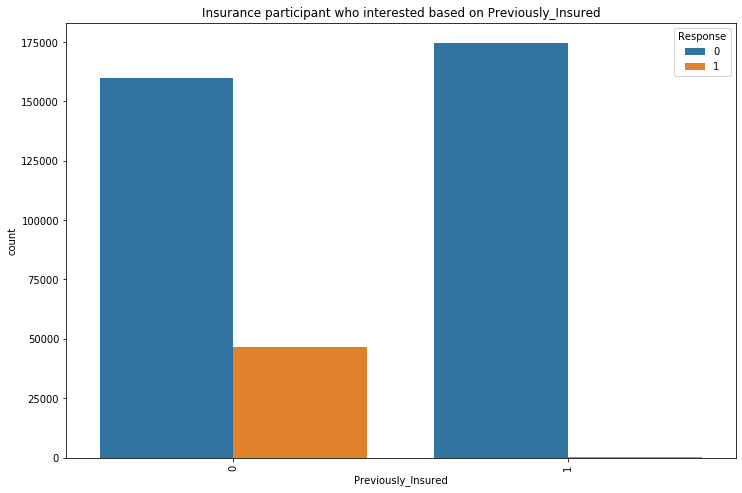

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(df['Previously_Insured'], hue=df['Response'])
plt.xticks(rotation=90)
plt.title("Insurance participant who interested based on Previously_Insured")
plt.show()

In [64]:
pd.crosstab(index=df['Previously_Insured'], columns=df['Response'])

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


- Customers who doesn't have vehicle insurance are more interested to offer than customers who had vehicle insurance before

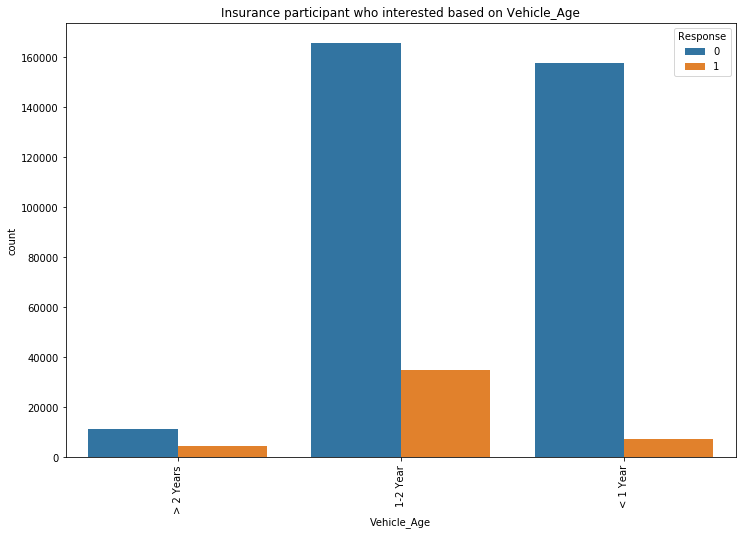

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_Age'], hue=df['Response'])
plt.xticks(rotation=90)
plt.title("Insurance participant who interested based on Vehicle_Age")
plt.show()

In [66]:
pd.crosstab(index=df['Vehicle_Age'], columns=df['Response'])

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


- Participants who own vehicles aged 1-2 years are more interested in vehicle insurance offers

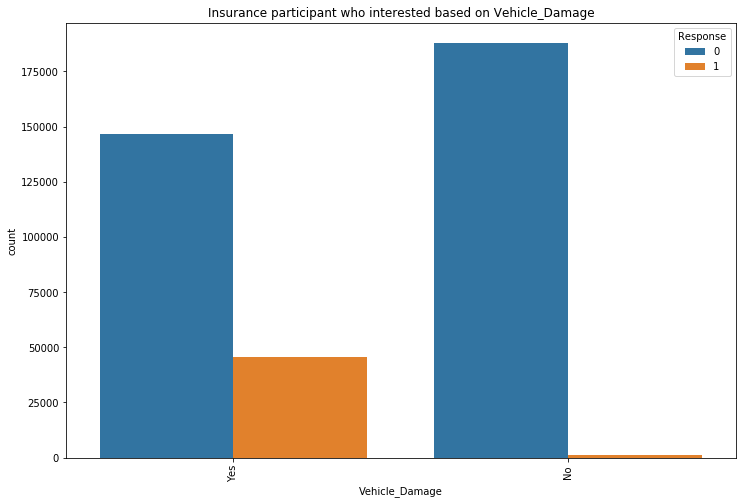

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_Damage'], hue=df['Response'])
plt.xticks(rotation=90)
plt.title("Insurance participant who interested based on Vehicle_Damage")
plt.show()

In [68]:
pd.crosstab(index=df['Vehicle_Damage'], columns=df['Response'])

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


- Participants who are interested in offering vehicle insurance, most of them have got vehicle damage in the past

## 4. Feature Engineering

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Encoding

In [4]:
df['Gender_En'] = df['Gender'].map({'Female':0, 'Male':1})

In [5]:
df['Vehicle_Age_En'] = df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})

In [6]:
df['Vehicle_Damage_En'] = df['Vehicle_Damage'].map({'No':0, 'Yes':1})

### Binning
- Binning feature Age based on WHO age classificaiton: https://www.sehatq.com/artikel/risiko-penyakit-berdasarkan-klasifikasi-umur-menurut-who
- Dewasa/Adults (0): 20 - 60 tahun
- Lanjut usia/Elderly (1): > 60 tahun

In [7]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [8]:
df['Age_bins'] = pd.cut(df['Age'], bins=[19,60,85], labels=[0,1])

In [10]:
df.drop(columns=['id','Gender','Age','Vehicle_Age','Vehicle_Damage'], inplace=True)

,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Age_bins
0,1,28.0,0,40454.0,26.0,217,1,1,2,1,0
1,1,3.0,0,33536.0,26.0,183,0,1,1,0,1
2,1,28.0,0,38294.0,26.0,27,1,1,2,1,0
3,1,11.0,1,28619.0,152.0,203,0,1,0,0,0
4,1,41.0,1,27496.0,152.0,39,0,0,0,0,0


## 5. Feature Selections

In [11]:
df.head()

,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Age_bins
0,1,28.0,0,40454.0,26.0,217,1,1,2,1,0
1,1,3.0,0,33536.0,26.0,183,0,1,1,0,1
2,1,28.0,0,38294.0,26.0,27,1,1,2,1,0
3,1,11.0,1,28619.0,152.0,203,0,1,0,0,0
4,1,41.0,1,27496.0,152.0,39,0,0,0,0,0


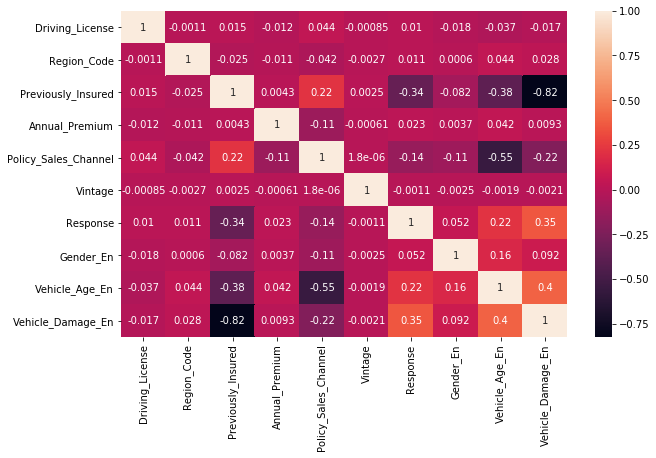

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

- We will not use 'Vintage' feature because after see the correlation heatmap. 'Vintage' has a very very weak correlation with 'Response' feature

In [15]:
df_clean = df.drop(columns='Vintage')
df_clean.head()

,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Age_bins
0,1,28.0,0,40454.0,26.0,1,1,2,1,0
1,1,3.0,0,33536.0,26.0,0,1,1,0,1
2,1,28.0,0,38294.0,26.0,1,1,2,1,0
3,1,11.0,1,28619.0,152.0,0,1,0,0,0
4,1,41.0,1,27496.0,152.0,0,0,0,0,0


## 6. Splitting Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_clean.drop(columns='Response')
y = df_clean['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, stratify=y, random_state=42)

## 7. Base Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
## Logistic Regression

In [20]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred_LR = model_LR.predict(X_test)
y_pred_train_LR = model_LR.predict(X_train)

In [22]:
## KNN Classifier

In [23]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred_KNN = model_KNN.predict(X_test)
y_pred_train_KNN = model_KNN.predict(X_train)

In [25]:
## Decision Tree

In [26]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
y_pred_DT = model_DT.predict(X_test)
y_pred_train_DT = model_DT.predict(X_train)

In [28]:
## Random Forest

In [29]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
y_pred_RF = model_RF.predict(X_test)
y_pred_train_RF = model_RF.predict(X_train)

## 8. Evaluation Matrix Base Model
### Evaluation matrix focus to recall Class 1 (Minority)
- Focus is to avoid False Negative errors ==> Actual is Interested, but the prediction is Not-Interested

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, accuracy_score

In [32]:
## Logistic Regression (Base) Eval-Matrix

In [33]:
print(classification_report(y_test, y_pred_LR))  ## test data

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.10      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.49      0.50      0.47     76222
weighted avg       0.78      0.88      0.82     76222



In [34]:
accuracy_score(y_test, y_pred_LR)

0.8771089711631812

- We can't use accuracy because it will be bias
- So we will use recall-precision, but their score is low, < 0.5

In [35]:
cm_LR = confusion_matrix(y_test, y_pred_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,3,9339
Akt 0,28,66852


In [36]:
print(classification_report(y_train, y_pred_train_LR))  ## train data

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    267519
           1       0.19      0.00      0.00     37368

    accuracy                           0.88    304887
   macro avg       0.53      0.50      0.47    304887
weighted avg       0.79      0.88      0.82    304887



In [37]:
cm_LR = confusion_matrix(y_train, y_pred_train_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,27,37341
Akt 0,117,267402


In [38]:
## KNN Classifier (Base) Eval-Matrix

In [39]:
print(classification_report(y_test, y_pred_KNN))  ## test data

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     66880
           1       0.24      0.07      0.11      9342

    accuracy                           0.86     76222
   macro avg       0.56      0.52      0.52     76222
weighted avg       0.80      0.86      0.82     76222



In [40]:
cm_LR = confusion_matrix(y_test, y_pred_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,668,8674
Akt 0,2089,64791


In [41]:
print(classification_report(y_train, y_pred_train_KNN))  ## train data

              precision    recall  f1-score   support

           0       0.89      0.98      0.94    267519
           1       0.57      0.17      0.27     37368

    accuracy                           0.88    304887
   macro avg       0.73      0.58      0.60    304887
weighted avg       0.86      0.88      0.85    304887



In [42]:
cm_LR = confusion_matrix(y_train, y_pred_train_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,6479,30889
Akt 0,4803,262716


In [43]:
## Decision Tree (Base) Eval-Matrix

In [44]:
print(classification_report(y_test, y_pred_DT)) ## test data

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     66880
           1       0.29      0.24      0.27      9342

    accuracy                           0.84     76222
   macro avg       0.60      0.58      0.59     76222
weighted avg       0.82      0.84      0.83     76222



In [45]:
cm_LR = confusion_matrix(y_test, y_pred_DT, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,2282,7060
Akt 0,5494,61386


In [46]:
print(classification_report(y_train, y_pred_train_DT)) ## train data

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    267519
           1       0.99      0.80      0.89     37368

    accuracy                           0.97    304887
   macro avg       0.98      0.90      0.94    304887
weighted avg       0.98      0.97      0.97    304887



In [47]:
cm_LR = confusion_matrix(y_train, y_pred_train_DT, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,29946,7422
Akt 0,206,267313


In [48]:
## Random Forest (Base) Eval-Matrix

In [49]:
print(classification_report(y_test, y_pred_RF))  ## test data

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     66880
           1       0.30      0.23      0.26      9342

    accuracy                           0.84     76222
   macro avg       0.60      0.58      0.59     76222
weighted avg       0.82      0.84      0.83     76222



In [50]:
cm_LR = confusion_matrix(y_test, y_pred_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,2157,7185
Akt 0,4937,61943


In [51]:
print(classification_report(y_train, y_pred_train_RF))  ## train data

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    267519
           1       0.98      0.81      0.89     37368

    accuracy                           0.97    304887
   macro avg       0.98      0.91      0.94    304887
weighted avg       0.97      0.97      0.97    304887



In [52]:
cm_LR = confusion_matrix(y_train, y_pred_train_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,30400,6968
Akt 0,690,266829


In [158]:
prec_train_LR = precision_score(y_train, y_pred_train_LR)
prec_train_KNN = precision_score(y_train, y_pred_train_KNN)
prec_train_DT = precision_score(y_train, y_pred_train_DT)
prec_train_RF = precision_score(y_train, y_pred_train_RF)

prec_test_LR = precision_score(y_test, y_pred_LR)
prec_test_KNN = precision_score(y_test, y_pred_KNN)
prec_test_DT = precision_score(y_test, y_pred_DT)
prec_test_RF = precision_score(y_test, y_pred_RF)

rec_train_LR = recall_score(y_train, y_pred_train_LR)
rec_train_KNN = recall_score(y_train, y_pred_train_KNN)
rec_train_DT = recall_score(y_train, y_pred_train_DT)
rec_train_RF = recall_score(y_train, y_pred_train_RF)

rec_test_LR = recall_score(y_test, y_pred_LR)
rec_test_KNN = recall_score(y_test, y_pred_KNN)
rec_test_DT = recall_score(y_test, y_pred_DT)
rec_test_RF = recall_score(y_test, y_pred_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_DT, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_DT, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_DT, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_DT, rec_test_RF]
}

mod_base = pd.DataFrame(data=EM, index=['LogReg','KNN_Clas','DT_Clas','RF_Clas']).round(2)

- Recall akan menjadi FOKUS dalam evaluation matrix
- Hasil evaluation matrix belum bagus, ada underfitting pada model Decision Tree dan Random Forest
- Karena target nya imbalance kita akan coba optimasi data dengan Random Over Sampling dan Random Under Sampling.

## 9. Data Improvement
- As we know the target are imbalance so we will try do data improvement with Random Over Sampling and Random Under Sampling

In [54]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Gender_En,Vehicle_Age_En,Vehicle_Damage_En,Age_bins,Response
274710,1,40.0,0,25455.0,152.0,1,0,1,0,0
216539,1,8.0,1,38393.0,26.0,0,0,0,0,0
78983,1,28.0,0,32118.0,122.0,0,0,1,0,1
218368,1,37.0,0,37711.0,152.0,1,0,1,0,0
307215,1,28.0,0,48706.0,156.0,0,0,1,0,0


In [55]:
df_train['Response'].value_counts()

0    267519
1     37368
Name: Response, dtype: int64

In [56]:
not_interest = df_train[df_train['Response'] == 0] ## Kelas Majority
interest = df_train[df_train['Response'] == 1] ## Kelas Minority

### Random Over Sampling

In [57]:
from sklearn.utils import resample

In [58]:
interest_oversample = resample(interest, ## Kelas Minority
                           replace=True,
                           n_samples = len(not_interest), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [59]:
df_OverSampled = pd.concat([not_interest, interest_oversample])

In [60]:
df_OverSampled['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

In [61]:
X_train_OverSample = df_OverSampled.drop(columns='Response')
y_train_OverSample = df_OverSampled['Response']

In [62]:
## LogReg Model Base + Random Over Sampling

In [63]:
os_LR = LogisticRegression()
os_LR.fit(X_train_OverSample, y_train_OverSample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_os_LR = os_LR.predict(X_test)
y_os_train_LR = os_LR.predict(X_train_OverSample)

In [65]:
print(classification_report(y_train_OverSample, y_os_train_LR))  ## train data

              precision    recall  f1-score   support

           0       0.85      0.65      0.74    267519
           1       0.72      0.88      0.79    267519

    accuracy                           0.77    535038
   macro avg       0.78      0.77      0.76    535038
weighted avg       0.78      0.77      0.76    535038



In [66]:
cm_LR = confusion_matrix(y_train_OverSample, y_os_train_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,236042,31477
Akt 0,93045,174474


In [67]:
print(classification_report(y_test, y_os_LR))  ## test data

              precision    recall  f1-score   support

           0       0.98      0.65      0.78     66880
           1       0.26      0.89      0.41      9342

    accuracy                           0.68     76222
   macro avg       0.62      0.77      0.59     76222
weighted avg       0.89      0.68      0.74     76222



In [68]:
cm_LR = confusion_matrix(y_test, y_os_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,8284,1058
Akt 0,23260,43620


In [69]:
## KNN Model Base + Random Over Sampling

In [70]:
os_KNN = KNeighborsClassifier()
os_KNN.fit(X_train_OverSample, y_train_OverSample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
y_os_KNN = os_KNN.predict(X_test)
y_os_train_KNN = os_KNN.predict(X_train_OverSample)

In [72]:
print(classification_report(y_train_OverSample, y_os_train_KNN))  ## train data

              precision    recall  f1-score   support

           0       0.88      0.81      0.85    267519
           1       0.83      0.89      0.86    267519

    accuracy                           0.85    535038
   macro avg       0.85      0.85      0.85    535038
weighted avg       0.85      0.85      0.85    535038



In [73]:
cm_LR = confusion_matrix(y_train_OverSample, y_os_train_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,238502,29017
Akt 0,50080,217439


In [74]:
print(classification_report(y_test, y_os_KNN))  ## test data

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     66880
           1       0.19      0.42      0.26      9342

    accuracy                           0.71     76222
   macro avg       0.54      0.58      0.54     76222
weighted avg       0.81      0.71      0.75     76222



In [75]:
cm_LR = confusion_matrix(y_test, y_os_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,3885,5457
Akt 0,16865,50015


In [76]:
## Decision Tree Model Base + Random Over Sampling

In [77]:
os_DT = DecisionTreeClassifier()
os_DT.fit(X_train_OverSample, y_train_OverSample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
y_os_DT = os_DT.predict(X_test)
y_os_train_DT = os_DT.predict(X_train_OverSample)

In [79]:
print(classification_report(y_train_OverSample, y_os_train_DT))  ## train data

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    267519
           1       0.94      0.99      0.97    267519

    accuracy                           0.96    535038
   macro avg       0.97      0.96      0.96    535038
weighted avg       0.97      0.96      0.96    535038



In [80]:
cm_LR = confusion_matrix(y_train_OverSample, y_os_train_DT, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,265065,2454
Akt 0,16599,250920


In [81]:
print(classification_report(y_test, y_os_DT))  ## test data

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     66880
           1       0.28      0.39      0.33      9342

    accuracy                           0.80     76222
   macro avg       0.60      0.63      0.61     76222
weighted avg       0.83      0.80      0.82     76222



In [82]:
cm_LR = confusion_matrix(y_test, y_os_DT, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,3675,5667
Akt 0,9382,57498


In [83]:
## Random Forest Model Base + Random Over Sampling

In [84]:
os_RF = RandomForestClassifier()
os_RF.fit(X_train_OverSample, y_train_OverSample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_os_RF = os_RF.predict(X_test)
y_os_train_RF = os_RF.predict(X_train_OverSample)

In [86]:
print(classification_report(y_train_OverSample, y_os_train_RF))  ## train data

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    267519
           1       0.94      0.99      0.97    267519

    accuracy                           0.96    535038
   macro avg       0.97      0.96      0.96    535038
weighted avg       0.97      0.96      0.96    535038



In [87]:
cm_LR = confusion_matrix(y_train_OverSample, y_os_train_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,265225,2294
Akt 0,16779,250740


In [88]:
print(classification_report(y_test, y_os_DT))  ## test data

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     66880
           1       0.28      0.39      0.33      9342

    accuracy                           0.80     76222
   macro avg       0.60      0.63      0.61     76222
weighted avg       0.83      0.80      0.82     76222



In [89]:
cm_LR = confusion_matrix(y_test, y_os_DT, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,3675,5667
Akt 0,9382,57498


In [165]:
prec_train_LR = precision_score(y_train_OverSample, y_os_train_LR)
prec_train_KNN = precision_score(y_train_OverSample, y_os_train_KNN)
prec_train_DT = precision_score(y_train_OverSample, y_os_train_DT)
prec_train_RF = precision_score(y_train_OverSample, y_os_train_RF)

prec_test_LR = precision_score(y_test, y_os_LR)
prec_test_KNN = precision_score(y_test, y_os_KNN)
prec_test_DT = precision_score(y_test, y_os_DT)
prec_test_RF = precision_score(y_test, y_os_RF)

rec_train_LR = recall_score(y_train_OverSample, y_os_train_LR)
rec_train_KNN = recall_score(y_train_OverSample, y_os_train_KNN)
rec_train_DT = recall_score(y_train_OverSample, y_os_train_DT)
rec_train_RF = recall_score(y_train_OverSample, y_os_train_RF)

rec_test_LR = recall_score(y_test, y_os_LR)
rec_test_KNN = recall_score(y_test, y_os_KNN)
rec_test_DT = recall_score(y_test, y_os_DT)
rec_test_RF = recall_score(y_test, y_os_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_DT, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_DT, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_DT, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_DT, rec_test_RF]
}

EM_OS = pd.DataFrame(data=EM, index=['LogReg_OS','KNN_Clas_OS','DT_Clas_OS','RF_Clas_OS']).round(2)

### Random Under Sampling

In [91]:
not_interest_oversample = resample(not_interest, ## Kelas Minority
                           replace=True,
                           n_samples = len(interest), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [92]:
df_UnderSampled = pd.concat([interest, not_interest_oversample])

In [93]:
df_UnderSampled['Response'].value_counts()

1    37368
0    37368
Name: Response, dtype: int64

In [94]:
X_train_UnderSample = df_UnderSampled.drop(columns='Response')
y_train_UnderSample = df_UnderSampled['Response']

In [95]:
## LogReg Model Base + Random Under Sampling

In [96]:
us_LR = LogisticRegression()
us_LR.fit(X_train_UnderSample, y_train_UnderSample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_us_LR = us_LR.predict(X_test)
y_us_train_LR = os_LR.predict(X_train_UnderSample)

In [98]:
print(classification_report(y_train_UnderSample, y_us_train_LR))  ## train data

              precision    recall  f1-score   support

           0       0.85      0.65      0.74     37368
           1       0.72      0.88      0.79     37368

    accuracy                           0.77     74736
   macro avg       0.78      0.77      0.77     74736
weighted avg       0.78      0.77      0.77     74736



In [99]:
cm_LR = confusion_matrix(y_train_UnderSample, y_us_train_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,32972,4396
Akt 0,12931,24437


In [100]:
print(classification_report(y_test, y_us_LR))  ## test data

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.97      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



In [101]:
cm_LR = confusion_matrix(y_test, y_us_LR, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,9093,249
Akt 0,27168,39712


In [102]:
## KNN Model Base + Random Under Sampling

In [103]:
us_KNN = KNeighborsClassifier()
us_KNN.fit(X_train_UnderSample, y_train_UnderSample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
y_us_KNN = us_KNN.predict(X_test)
y_us_train_KNN = os_KNN.predict(X_train_UnderSample)

In [105]:
print(classification_report(y_train_UnderSample, y_us_train_KNN))  ## train data

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     37368
           1       0.83      0.88      0.85     37368

    accuracy                           0.85     74736
   macro avg       0.85      0.85      0.85     74736
weighted avg       0.85      0.85      0.85     74736



In [106]:
cm_LR = confusion_matrix(y_train_UnderSample, y_us_train_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,32931,4437
Akt 0,6884,30484


In [107]:
print(classification_report(y_test, y_us_KNN))  ## test data

              precision    recall  f1-score   support

           0       0.93      0.58      0.71     66880
           1       0.18      0.68      0.29      9342

    accuracy                           0.59     76222
   macro avg       0.56      0.63      0.50     76222
weighted avg       0.84      0.59      0.66     76222



In [108]:
cm_LR = confusion_matrix(y_test, y_us_KNN, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,6397,2945
Akt 0,28201,38679


In [109]:
## Decision Tree Model Base + Random Under Sampling

In [110]:
us_DT = DecisionTreeClassifier()
us_DT.fit(X_train_UnderSample, y_train_UnderSample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
y_us_DT = us_DT.predict(X_test)
y_us_train_DT = os_DT.predict(X_train_UnderSample)

In [112]:
print(classification_report(y_train_UnderSample, y_us_train_DT))  ## train data

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     37368
           1       0.94      0.99      0.96     37368

    accuracy                           0.96     74736
   macro avg       0.96      0.96      0.96     74736
weighted avg       0.96      0.96      0.96     74736



In [113]:
cm_LR = confusion_matrix(y_train_UnderSample, y_us_train_DT, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,36951,417
Akt 0,2286,35082


In [114]:
print(classification_report(y_test, y_us_DT))  ## test data

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     66880
           1       0.27      0.75      0.39      9342

    accuracy                           0.72     76222
   macro avg       0.61      0.73      0.60     76222
weighted avg       0.87      0.72      0.76     76222



In [115]:
cm_LR = confusion_matrix(y_test, y_us_DT, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,7017,2325
Akt 0,19336,47544


In [116]:
## Random Forest Model Base + Random Under Sampling

In [117]:
us_RF = RandomForestClassifier()
us_RF.fit(X_train_UnderSample, y_train_UnderSample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
y_us_RF = us_RF.predict(X_test)
y_us_train_RF = os_RF.predict(X_train_UnderSample)

In [119]:
print(classification_report(y_train_UnderSample, y_us_train_RF))  ## train data

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     37368
           1       0.94      0.99      0.96     37368

    accuracy                           0.96     74736
   macro avg       0.97      0.96      0.96     74736
weighted avg       0.97      0.96      0.96     74736



In [120]:
cm_LR = confusion_matrix(y_train_UnderSample, y_us_train_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,36980,388
Akt 0,2316,35052


In [121]:
print(classification_report(y_test, y_us_RF))  ## test data

              precision    recall  f1-score   support

           0       0.96      0.71      0.81     66880
           1       0.27      0.78      0.40      9342

    accuracy                           0.72     76222
   macro avg       0.62      0.74      0.61     76222
weighted avg       0.87      0.72      0.76     76222



In [122]:
cm_LR = confusion_matrix(y_test, y_us_RF, labels=[1 , 0])
# df_LR = pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
pd.DataFrame(data=cm_LR, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,7286,2056
Akt 0,19519,47361


In [163]:
prec_train_LR = precision_score(y_train_UnderSample, y_us_train_LR)
prec_train_KNN = precision_score(y_train_UnderSample, y_us_train_KNN)
prec_train_DT = precision_score(y_train_UnderSample, y_us_train_DT)
prec_train_RF = precision_score(y_train_UnderSample, y_us_train_RF)

prec_test_LR = precision_score(y_test, y_us_LR)
prec_test_KNN = precision_score(y_test, y_us_KNN)
prec_test_DT = precision_score(y_test, y_us_DT)
prec_test_RF = precision_score(y_test, y_us_RF)

rec_train_LR = recall_score(y_train_UnderSample, y_us_train_LR)
rec_train_KNN = recall_score(y_train_UnderSample, y_us_train_KNN)
rec_train_DT = recall_score(y_train_UnderSample, y_us_train_DT)
rec_train_RF = recall_score(y_train_UnderSample, y_us_train_RF)

rec_test_LR = recall_score(y_test, y_us_LR)
rec_test_KNN = recall_score(y_test, y_us_KNN)
rec_test_DT = recall_score(y_test, y_us_DT)
rec_test_RF = recall_score(y_test, y_us_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_DT, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_DT, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_DT, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_DT, rec_test_RF],
    
    
}

EM_US = pd.DataFrame(data=EM, index=['LogReg_US','KNN_Clas_US','DT_Clas_US','RF_Clas_US']).round(2)
EM_US

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg_US,0.72,0.25,0.88,0.97
KNN_Clas_US,0.83,0.18,0.88,0.68
DT_Clas_US,0.94,0.27,0.99,0.75
RF_Clas_US,0.94,0.27,0.99,0.78


In [166]:
EM_OS

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg_OS,0.72,0.26,0.88,0.89
KNN_Clas_OS,0.83,0.19,0.89,0.42
DT_Clas_OS,0.94,0.28,0.99,0.39
RF_Clas_OS,0.94,0.28,0.99,0.40


- Hasil evaluation matrix meningkat setelah Under Sampling dan Over Sampling data. Jika keduanya dibandingkan yang paling bagus hasilnya adalah Under Sampling. Angkanya besar dan tidak overfitting. And of course we will use Under Sampling
- Next we will try to optimize model with Hyper Parameter Tuning

## 10. Model Improvement
- We will try to improve the model with Tuning / Hyper Parameter Tuning

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
## Logistic Regression Tuned

In [127]:
## LogReg kita cuma menambahkan parameter 'class_weight'
tune_LR = LogisticRegression(class_weight={0:.12, 1:.88})
tune_LR.fit(X_train_UnderSample, y_train_UnderSample)

LogisticRegression(C=1.0, class_weight={0: 0.12, 1: 0.88}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
y_tune_LR = tune_LR.predict(X_test)
y_tune_train_LR = tune_LR.predict(X_train_UnderSample)

In [129]:
print(classification_report(y_train_UnderSample, y_tune_train_LR))  ## Train data

              precision    recall  f1-score   support

           0       0.98      0.55      0.70     37368
           1       0.69      0.99      0.81     37368

    accuracy                           0.77     74736
   macro avg       0.83      0.77      0.76     74736
weighted avg       0.83      0.77      0.76     74736



In [130]:
cm = confusion_matrix(y_train_UnderSample, y_tune_train_LR, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,37001,367
Akt 0,16901,20467


In [131]:
print(classification_report(y_test, y_tune_LR))  ## Test Data

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     66880
           1       0.23      0.99      0.38      9342

    accuracy                           0.60     76222
   macro avg       0.62      0.77      0.54     76222
weighted avg       0.90      0.60      0.67     76222



In [132]:
cm = confusion_matrix(y_test, y_tune_LR, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,9251,91
Akt 0,30336,36544


In [ ]:
## KNN Classifier Tuned

In [133]:
tune_KNN = KNeighborsClassifier()

param_KNN = {"n_neighbors" : [5, 15, 25, 35, 65],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

In [134]:
model_KNN = GridSearchCV(estimator=tune_KNN, param_grid=param_KNN, n_jobs = -1, cv = 3, verbose=1, scoring='recall')

In [135]:
model_KNN.fit(X_train_UnderSample, y_train_UnderSample)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 35, 65], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [136]:
KNN_Tuned = model_KNN.best_estimator_
y_tuned_KNN = KNN_Tuned.predict(X_test)
y_tuned_train_KNN = KNN_Tuned.predict(X_train_UnderSample)

In [137]:
print(classification_report(y_train_UnderSample, y_tuned_train_KNN))  ## Train data

              precision    recall  f1-score   support

           0       0.73      0.59      0.65     37368
           1       0.66      0.78      0.71     37368

    accuracy                           0.69     74736
   macro avg       0.69      0.69      0.68     74736
weighted avg       0.69      0.69      0.68     74736



In [138]:
cm = confusion_matrix(y_train_UnderSample, y_tuned_train_KNN, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,29195,8173
Akt 0,15322,22046


In [139]:
print(classification_report(y_test, y_tuned_KNN))  ## Test data

              precision    recall  f1-score   support

           0       0.94      0.56      0.71     66880
           1       0.20      0.76      0.31      9342

    accuracy                           0.59     76222
   macro avg       0.57      0.66      0.51     76222
weighted avg       0.85      0.59      0.66     76222



In [140]:
cm = confusion_matrix(y_test, y_tuned_KNN, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,7105,2237
Akt 0,29181,37699


In [ ]:
## Decision Tree Class Tuned

In [141]:
tune_DT = DecisionTreeClassifier()

param_DT ={"max_depth" : [None, 5, 7, 9],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .8, .7]}

In [142]:
model_DT = GridSearchCV(estimator=tune_DT, param_grid=param_DT, cv = 3, n_jobs=-1, verbose=1)

In [143]:
model_DT.fit(X_train_UnderSample, y_train_UnderSample)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   52.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9],
                         

In [144]:
DT_tuned = model_DT.best_estimator_
y_tuned_DT = DT_tuned.predict(X_test)
y_tuned_train_DT = DT_tuned.predict(X_train_UnderSample)

In [145]:
print(classification_report(y_train_UnderSample, y_tuned_train_DT))  ## Train data

              precision    recall  f1-score   support

           0       0.93      0.65      0.76     37368
           1       0.73      0.95      0.82     37368

    accuracy                           0.80     74736
   macro avg       0.83      0.80      0.79     74736
weighted avg       0.83      0.80      0.79     74736



In [148]:
cm = confusion_matrix(y_train_UnderSample, y_tuned_train_DT, labels=[1, 0])
pd.DataFrame(data=cm, index = ['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,35461,1907
Akt 0,13152,24216


In [146]:
print(classification_report(y_test, y_tuned_DT))  ## Test data

              precision    recall  f1-score   support

           0       0.99      0.64      0.78     66880
           1       0.27      0.95      0.42      9342

    accuracy                           0.68     76222
   macro avg       0.63      0.80      0.60     76222
weighted avg       0.90      0.68      0.74     76222



In [149]:
cm = confusion_matrix(y_test, y_tuned_DT, labels=[1, 0])
pd.DataFrame(data=cm, index = ['Akt 1','Akt 0'], columns=['Pred 1','Pred 0'])

,Pred 1,Pred 0
Akt 1,8836,506
Akt 0,23755,43125


In [ ]:
## Random Forest Class Tuned

In [150]:
tune_RF = RandomForestClassifier()

param_RF ={"max_depth" : [None, 5, 7, 9],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .8, .7]}

In [151]:
model_RF = GridSearchCV(estimator=tune_RF, param_grid=param_RF, cv = 3, n_jobs=-1, verbose=1)

In [152]:
model_RF.fit(X_train_UnderSample, y_train_UnderSample)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 32.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [153]:
RF_tuned = model_RF.best_estimator_
y_tuned_RF = RF_tuned.predict(X_test)
y_tuned_train_RF = RF_tuned.predict(X_train_UnderSample)

In [154]:
print(classification_report(y_train_UnderSample, y_tuned_train_RF))  ## Train data

              precision    recall  f1-score   support

           0       0.92      0.66      0.77     37368
           1       0.73      0.94      0.83     37368

    accuracy                           0.80     74736
   macro avg       0.83      0.80      0.80     74736
weighted avg       0.83      0.80      0.80     74736



In [155]:
print(classification_report(y_test, y_tuned_RF)) ## Test data

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     66880
           1       0.27      0.94      0.43      9342

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222



In [157]:
prec_train_LR = precision_score(y_train_UnderSample, y_tune_train_LR)
prec_train_KNN = precision_score(y_train_UnderSample, y_tuned_train_KNN)
prec_train_DT = precision_score(y_train_UnderSample, y_tuned_train_DT)
prec_train_RF = precision_score(y_train_UnderSample, y_tuned_train_RF)

prec_test_LR = precision_score(y_test, y_tune_LR)
prec_test_KNN = precision_score(y_test, y_tuned_KNN)
prec_test_DT = precision_score(y_test, y_tuned_DT)
prec_test_RF = precision_score(y_test, y_tuned_RF)

rec_train_LR = recall_score(y_train_UnderSample, y_tune_train_LR)
rec_train_KNN = recall_score(y_train_UnderSample, y_tuned_train_KNN)
rec_train_DT = recall_score(y_train_UnderSample, y_tuned_train_DT)
rec_train_RF = recall_score(y_train_UnderSample, y_tuned_train_RF)

rec_test_LR = recall_score(y_test, y_tune_LR)
rec_test_KNN = recall_score(y_test, y_tuned_KNN)
rec_test_DT = recall_score(y_test, y_tuned_DT)
rec_test_RF = recall_score(y_test, y_tuned_RF)

EM = {
    'Precision_Train':[prec_train_LR, prec_train_KNN, prec_train_DT, prec_train_RF],
    'Precision_Test':[prec_test_LR, prec_test_KNN, prec_test_DT, prec_test_RF],
    'Recall_Train':[rec_train_LR, rec_train_KNN, rec_train_DT, rec_train_RF],
    'Recall_Test':[rec_test_LR, rec_test_KNN, rec_test_DT, rec_test_RF],
}

mod_tuned = pd.DataFrame(data=EM, index=['LogReg_Tuned','KNN_Clas_Tuned','DT_Clas_Tuned','RF_Clas_Tuned']).round(2)

In [167]:
pd.concat([mod_base, EM_OS, EM_US, mod_tuned])

,Precision_Train,Precision_Test,Recall_Train,Recall_Test
LogReg,0.19,0.10,0.00,0.00
KNN_Clas,0.57,0.24,0.17,0.07
DT_Clas,0.99,0.29,0.80,0.24
RF_Clas,0.98,0.30,0.81,0.23
LogReg_OS,0.72,0.26,0.88,0.89
KNN_Clas_OS,0.83,0.19,0.89,0.42
DT_Clas_OS,0.94,0.28,0.99,0.39
RF_Clas_OS,0.94,0.28,0.99,0.40
LogReg_US,0.72,0.25,0.88,0.97
KNN_Clas_US,0.83,0.18,0.88,0.68


- Setelah dilakukan Hyper Parameter Tuning, hasil evaluation matrix menjadi lebih baik. Dari 4 model, model yang paling bagus evaluation matrix nya adalah Logistic Regression
- Langkah selanjutnya jika ada deployment model, kita akan mengekspor model Logistic Regression